In [1]:
import pandas as pd

df = pd.read_csv("../Reports/50_Startups.csv")

In [2]:
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64


In [3]:
x = df.drop(columns=["Profit"])
y = df["Profit"]

Splitting data into Training and Testing data set


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Model-Linear Regression


In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [6]:
lr.fit(x_train, y_train)

LinearRegression()

evaluate the interecept and coefficient


In [7]:
c = lr.intercept_
c

np.float64(42448.52861957176)

In [8]:
m = lr.coef_
m

array([0.79045925, 0.03114407, 0.03137206])

predicting the accuracy of train and test dataset


In [20]:
y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

plot of actual vs predicted profit for training data


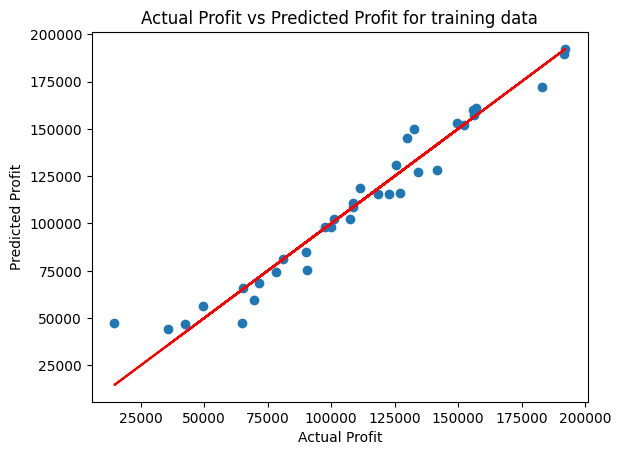

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_predict_train)
plt.plot(y_train, y_train, color="red")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual Profit vs Predicted Profit for training data")
plt.show()

plot of actual vs predicted profit for test data


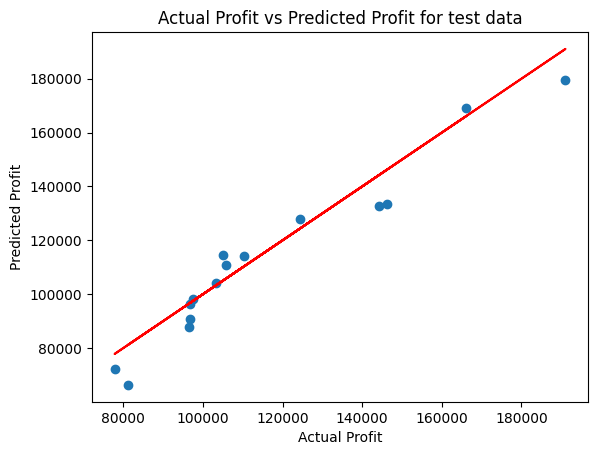

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual Profit vs Predicted Profit for test data")
plt.show()

Residual plot 

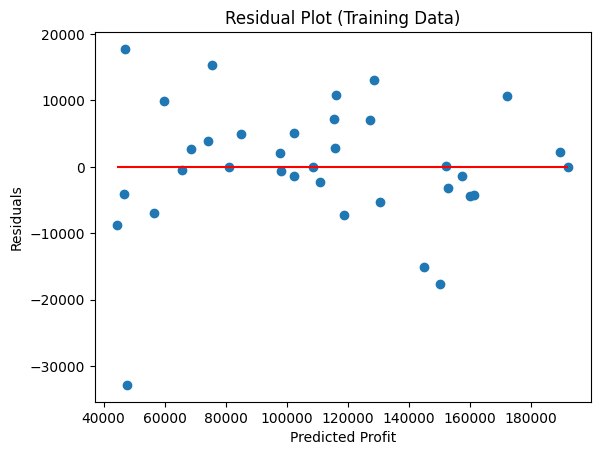

In [24]:
plt.scatter(y_predict_train, y_train - y_predict_train)
plt.hlines(y=0, xmin=min(y_predict_train), xmax=max(y_predict_train), colors="red")
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training Data)")
plt.show()

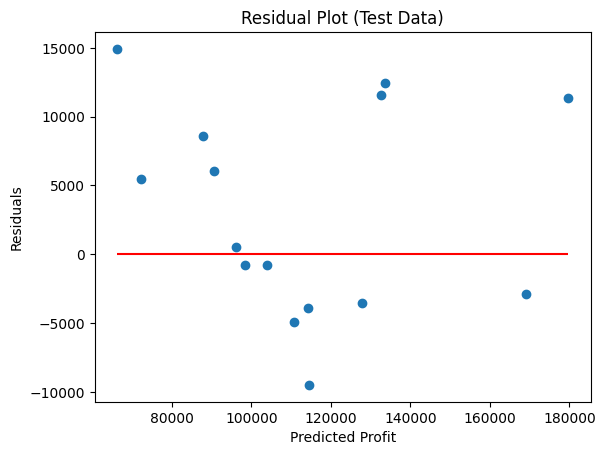

In [25]:
plt.scatter(y_predict_test, y_test - y_predict_test)
plt.hlines(y=0, xmin=min(y_predict_test), xmax=max(y_predict_test), colors="red")
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Data)")
plt.show()

In [27]:
import seaborn as sns

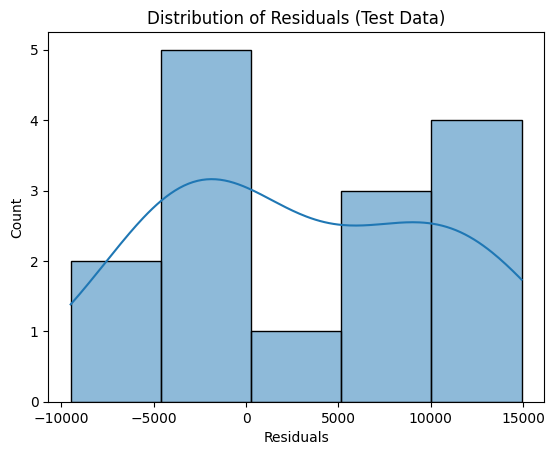

In [28]:
sns.histplot(y_test - y_predict_test, kde=True)
plt.title("Distribution of Residuals (Test Data)")
plt.xlabel("Residuals")
plt.show()

accuracy of the trained model


In [11]:
from sklearn.metrics import r2_score

r2_score(y_train, y_predict_train)

0.9515391457049143

accuracy score of test data


In [14]:
r2_score(y_test, y_predict_test)

0.9355188337118219

Regression matrices
1.MAE(Mean Absolute Error):


In [32]:
from sklearn.metrics import mean_absolute_error, explained_variance_score
import numpy as np

In [16]:
mae_test = mean_absolute_error(y_test, y_predict_test)
print("Mean Absolute Error of test data: ", mae_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
print("Mean Absolute Error of train data: ", mae_train)

Mean Absolute Error of test data:  6489.6601704866425
Mean Absolute Error of train data:  6616.228670720838


MSE(Mean Squared Error):


In [17]:
mse_test = np.mean((y_test - y_predict_test) ** 2)
print("Mean Squared Error of test data: ", mse_test)
mse_train = np.mean((y_train - y_predict_train) ** 2)
print("Mean Squared Error of train data: ", mse_train)

Mean Squared Error of test data:  62240269.842915125
Mean Squared Error of train data:  89657314.14918503


RMSE(Root Mean Square Error):
widely used


In [18]:
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error of train data: ", rmse_train)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error of test data: ", rmse_test)

Root Mean Squared Error of train data:  9468.754625038344
Root Mean Squared Error of test data:  7889.250271281494


Adjusted R2 score:


In [19]:
adj_r2_test = 1 - (
    (1 - r2_score(y_test, y_predict_test))
    * (len(x_test) - 1)
    / (len(x_test) - x_test.shape[1] - 1)
)
print("Adjusted R2 Score of test data: ", adj_r2_test)
adj_r2_train = 1 - (
    (1 - r2_score(y_train, y_predict_train))
    * (len(x_train) - 1)
    / (len(x_train) - x_train.shape[1] - 1)
)
print("Adjusted R2 Score of train data: ", adj_r2_train)

Adjusted R2 Score of test data:  0.9179330610877733
Adjusted R2 Score of train data:  0.9468493856118414


In [33]:
print(
    "Explained Variance Score (Test Data):",
    explained_variance_score(y_test, y_predict_test),
)

Explained Variance Score (Test Data): 0.9446515493600537
